In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import fashion_mnist
import keras

print(tf.__version__)

2.10.0


In [5]:
print(tf.config.list_physical_devices('GPU'))
tf.test.gpu_device_name()

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


'/device:GPU:0'

In [6]:
# Styles

my_style = {
    'figure.facecolor': '#111111',
    'axes.facecolor': '#111111',
    'axes.labelcolor': '#bbbbbb',
    'axes.titlecolor': '#bbbbbb',
    'xtick.color': '#bbbbbb',
    'ytick.color': '#bbbbbb',
    'legend.facecolor': '#111111',
    'legend.edgecolor': '#bbbbbb',
    'text.color': '#bbbbbb',
    'axes.edgecolor': '#bbbbbb',
    'font.size': 10
}

plt.style.use(my_style)

#### Labels & others

In [7]:
# labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### Train / Test

In [8]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#### Present

In [9]:
print(train_images.shape)
print(len(train_labels))
print(train_labels)

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]


In [10]:
print(test_images.shape)
print(len(test_labels))
print(test_labels)

(10000, 28, 28)
10000
[9 2 1 ... 8 1 5]


#### Preprocessing the data

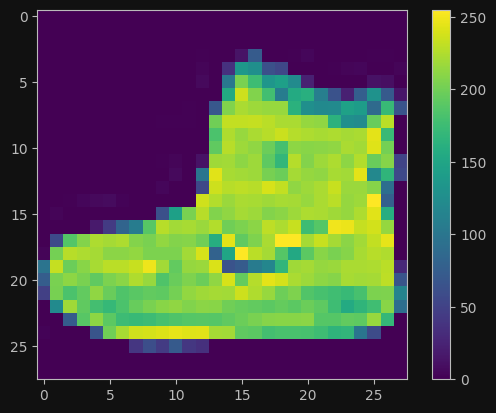

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

In [12]:
train_images = train_images / 255
test_images = test_images / 255

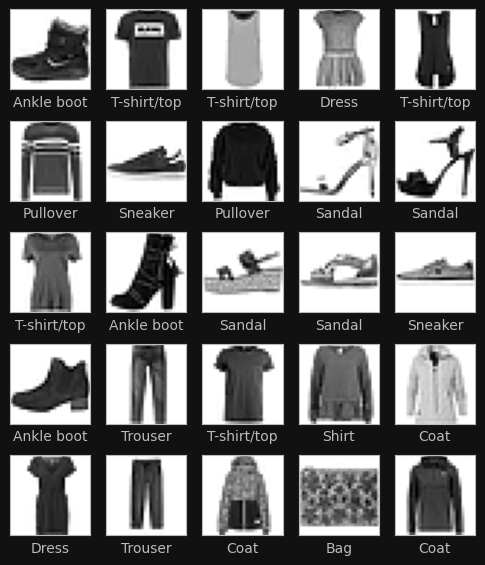

In [13]:
plt.figure(figsize=(6, 7))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()

#### Model

In [21]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.losses import SparseCategoricalCrossentropy

model = Sequential([
    Flatten(input_shape=(28, 28), name='input'),
    Dense(228, activation='relu', name='hidden_one'),
    Dense(164, activation='sigmoid', name='hidden_two'),
    Dense(10, activation='softmax', name='output')
])

In [22]:
model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

#### Learning

In [23]:
history = model.fit(train_images, train_labels, epochs=18)

Epoch 1/18
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4818 - accuracy: 0.8267
Epoch 2/18
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3549 - accuracy: 0.8692
Epoch 3/18
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3169 - accuracy: 0.8814
Epoch 4/18
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2937 - accuracy: 0.8906
Epoch 5/18
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2755 - accuracy: 0.8971
Epoch 6/18
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2611 - accuracy: 0.9020
Epoch 7/18
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2463 - accuracy: 0.9071
Epoch 8/18
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2354 - accuracy: 0.9101
Epoch 9/18
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2247 - accuracy: 0.9151
Epoch 10/18
1875/1875 [==============================] - 4s 2ms/step - loss: 0.213

#### Evaluate

In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

313/313 - 1s - loss: 0.3412 - accuracy: 0.8945 - 609ms/epoch - 2ms/step

Test accuracy: 0.8945


#### Conclusion

Подбирая количество слоев, их размер, количество нейронов, размер batch, эпохи и подходящие оптимизаторы, мы можем значительно улучшить наш прогноз.

Стоит искать золотую середину между качеством модели и производительностью, но, конечно, все зависит от поставленной задачи.

Из особенностей:
* Количество слоев напрямую влияет на сложность настройки модели. Чем их больше, тем сложнее подобрать нужные параметры.
* Достаточное количество нейронов положительно влияет на качество модели, но есть риск переобучения или лишней нагрузки
на CPU/GPU (если, например, много эпох и маленький batch_size).
* Размер каждого слоя влияет на поведение следующего.

Из функций я использовал keras.backend.set_session, keras.backend.clear_session, keras.backend.get_session, gc.collect
для создания функции keras_reset. Не буду лукавить, решение подсмотрел в интернете.
Дело в том, что при обработке большого количества итераций память видеокарты заполнялась, но не происходило срабатывания garbage при завершении итерации, хотя по идее это должно происходить в автоматическом режиме. Из-за заполнения памяти вылетала ошибка. И приходилось перезапускать ядро Jupyter.

Функция keras_reset принудительно завершает сессию, очищает память и создает новую сессию. Подставляя эту функцию в цикл, мы добиваемся того, что используемая память обнуляется при начале каждого прохода.

P.S. Сбивает с толку, какое именно задание нужно делать. В ноутбуках другие задания. Это задание, я уже делал (предыдущий урок).